In [1]:
from os import listdir
from os import path
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
pred_files = listdir("/media/wittmaan/Elements/data/a2d2/pred")

In [3]:
#pred_files[90]
image = cv2.imread('/media/wittmaan/Elements/data/a2d2/camera_lidar_semantic_bboxes/20180807_145028/camera/cam_front_center/20180807145028_camera_frontcenter_000006176.jpg')

In [6]:
for line in open(path.join("/media/wittmaan/Elements/data/a2d2/pred",pred_files[90])).readlines():
    line = line.strip().split(' ')
        
    if (len(line) < 13):
        continue
        
    x_min, y_min, x_max, y_max = [int(float(number)) for number in line[2:6]]
    
    tmp = line[6:9]
    tmp[0] = tmp[0].replace('[', '')
    tmp[2] = tmp[2].replace(']', '')
    try:
        dims = np.asarray([float(number) for number in tmp])
    except: 
        dims = None
        print("could not convert dims")
            
    tmp2 = line[11:14]
    tmp2[0] = tmp2[0].replace('[', '').replace(']', '')
    tmp2[2] = tmp2[2].replace('[', '').replace(']', '')
    tmp2 = [x.replace(',', '') for x in tmp2]
    
    center = np.asarray([float(number) for number in tmp2])
    alpha = line[9]
    
    rot_y  = float(alpha) + np.arctan(center[0]/center[2])
    
    box_3d = []

    for i in [1,-1]:
        for j in [1,-1]:
            for k in [0,1]:
                point = np.copy(center)
                point[0] = center[0] + i * dims[1]/2 * np.cos(-rot_y+np.pi/2) + (j*i) * dims[2]/2 * np.cos(-rot_y)
                point[2] = center[2] + i * dims[1]/2 * np.sin(-rot_y+np.pi/2) + (j*i) * dims[2]/2 * np.sin(-rot_y)                  
                point[1] = center[1] - k * dims[0]

                point = np.append(point, 1)
                #point = np.dot(cam_to_img, point)
                point = point[:2]/point[2]
                point = point.astype(np.int16)
                box_3d.append(point)
                
    print(f"box_3d={box_3d}")
                
    for i in range(4):
        point_1_ = box_3d[2*i]
        point_2_ = box_3d[2*i+1]
        cv2.line(image, (point_1_[0], point_1_[1]), (point_2_[0], point_2_[1]), (255,0,0), 3)
            
    for i in range(8):
        point_1_ = box_3d[i]
        point_2_ = box_3d[(i+2)%8]
        cv2.line(image, (point_1_[0], point_1_[1]), (point_2_[0], point_2_[1]), (255,0,0), 3)

box_3d=[array([-30,   0], dtype=int16), array([-30,   1], dtype=int16), array([-141,   -3], dtype=int16), array([-141,    4], dtype=int16), array([-196,   -5], dtype=int16), array([-196,    6], dtype=int16), array([-31,   0], dtype=int16), array([-31,   1], dtype=int16)]
box_3d=[array([-12,   0], dtype=int16), array([-12,   2], dtype=int16), array([-67,   5], dtype=int16), array([-67,  15], dtype=int16), array([-127,   10], dtype=int16), array([-127,   32], dtype=int16), array([-12,   0], dtype=int16), array([-12,   3], dtype=int16)]


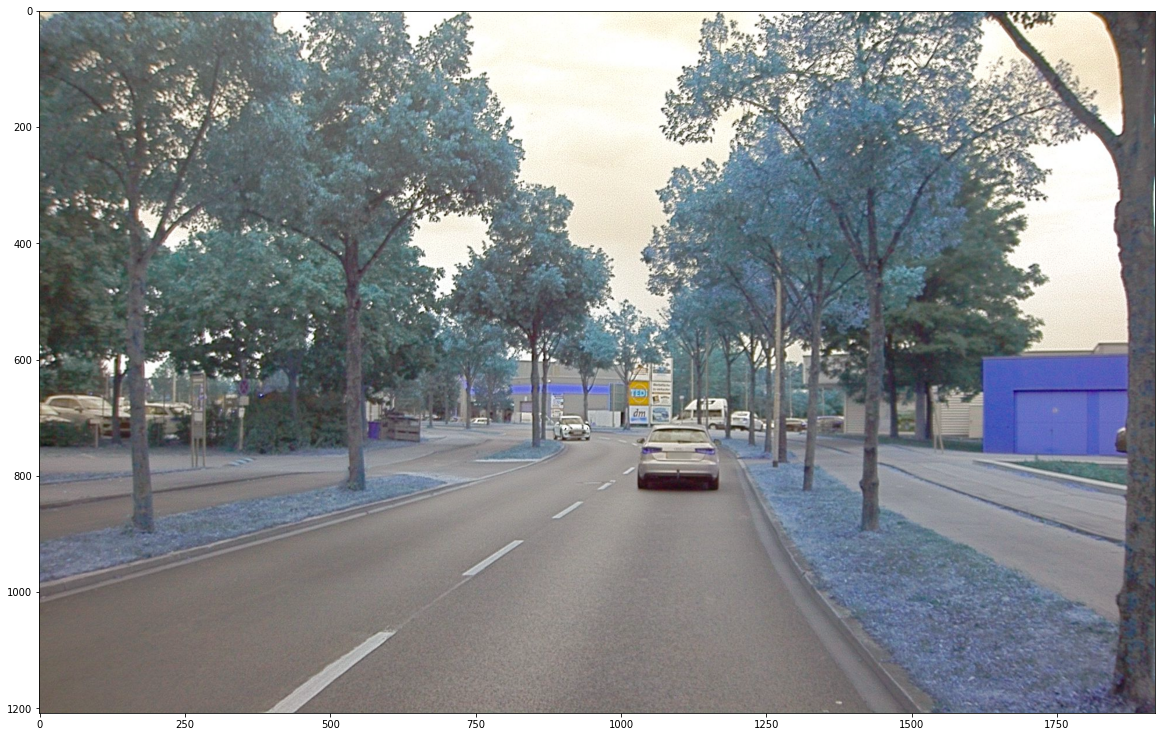

In [7]:
fig = plt.figure(figsize=(20,20))
plt.imshow(image); plt.show()